In [ ]:
# Mini project Credit Risk


In [94]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff


In [5]:
# Dataset reading 
arff_file = arff.loadarff (r'C:\Users\gayat\Dropbox\PC\Desktop\Western University\Mini project\Credit Risk\credit.arff')

In [8]:
df = pd.DataFrame(arff_file[0])

In [20]:
df.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,"b""'<0'""",6.0,"b""'critical/other existing credit'""",b'radio/tv',1169.0,"b""'no known savings'""","b""'>=7'""",4.0,"b""'male single'""",b'none',...,"b""'real estate'""",67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,"b""'0<=X<200'""",48.0,"b""'existing paid'""",b'radio/tv',5951.0,"b""'<100'""","b""'1<=X<4'""",2.0,"b""'female div/dep/mar'""",b'none',...,"b""'real estate'""",22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,"b""'no checking'""",12.0,"b""'critical/other existing credit'""",b'education',2096.0,"b""'<100'""","b""'4<=X<7'""",2.0,"b""'male single'""",b'none',...,"b""'real estate'""",49.0,b'none',b'own',1.0,"b""'unskilled resident'""",2.0,b'none',b'yes',b'good'


In [18]:
# Check any missing values
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null float64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null float64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null float64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null float64
property_magnitude        1000 non-null object
age                       1000 non-null float64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null float64
job                       1000 non-null object
num_dependents            1000 non-null float64
own_telephone             1000 non-null o

In [ ]:
# split dataset as categoric 
cat = df.dtypes == 'object'

In [ ]:
# Categorical
df.loc[:,cat].head(5)

In [36]:
# Countinous
df.loc[:,~cat].head(5)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0


Preprocessing

In [43]:
# exploring nu_dependents feature
print(df.num_dependents.nunique())
print(df.num_dependents.value_counts())

2
1.0    845
2.0    155
Name: num_dependents, dtype: int64


In [44]:
# Num_dependents feature data type change to object (1/2)
df.num_dependents=df.num_dependents.astype('object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_status           1000 non-null object
duration                  1000 non-null float64
credit_history            1000 non-null object
purpose                   1000 non-null object
credit_amount             1000 non-null float64
savings_status            1000 non-null object
employment                1000 non-null object
installment_commitment    1000 non-null float64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null float64
property_magnitude        1000 non-null object
age                       1000 non-null float64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null float64
job                       1000 non-null object
num_dependents            1000 non-null object
own_telephone             1000 non-null ob

In [49]:
# New cantinouse features
cat = df.dtypes=='object'
cat.tail(3)

own_telephone     True
foreign_worker    True
class             True
dtype: bool

In [74]:
# Split target feature 
X = df.drop('class',axis=1)
y = df['class'] 
X.shape, y.shape

((1000, 20), (1000,))

In [61]:
X.head(3)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,"b""'<0'""",-1.236478,"b""'critical/other existing credit'""",b'radio/tv',-0.745131,"b""'no known savings'""","b""'>=7'""",0.918477,"b""'male single'""",b'none',1.046987,"b""'real estate'""",2.766456,b'none',b'own',1.027079,b'skilled',1,b'yes',b'yes'
1,"b""'0<=X<200'""",2.248194,"b""'existing paid'""",b'radio/tv',0.949817,"b""'<100'""","b""'1<=X<4'""",-0.870183,"b""'female div/dep/mar'""",b'none',-0.765977,"b""'real estate'""",-1.191404,b'none',b'own',-0.704926,b'skilled',1,b'none',b'yes'
2,"b""'no checking'""",-0.738668,"b""'critical/other existing credit'""",b'education',-0.416562,"b""'<100'""","b""'4<=X<7'""",-0.870183,"b""'male single'""",b'none',0.140505,"b""'real estate'""",1.183312,b'none',b'own',-0.704926,"b""'unskilled resident'""",2,b'none',b'yes'


In [79]:
# Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# get numerical data
df_num = X.select_dtypes(exclude='object')
# update the column with our normalization
X[df_num.columns]=scaler.fit_transform(df_num)
#convert string to one hot encoding 
X_1 = pd.get_dummies(X)
y_1= pd.get_dummies(y)
y_2 = y_1[b'good']
X_1.shape,y_2.shape

((1000, 62), (1000,))

In [80]:
# Training set 80%,validation set 10%,test set 10%
from sklearn.model_selection import train_test_split 
x, x_test, y, y_test = train_test_split(X_1,y_2,test_size=0.1,train_size=0.9)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,test_size = 0.1,train_size =0.9)
x_train.shape, x_test.shape, x_cv.shape, y_train.shape, y_test.shape, y_cv.shape, 


((810, 62), (100, 62), (90, 62), (810,), (100,), (90,))

In [54]:
df_N.head(5)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,"checking_status_b""'0<=X<200'""","checking_status_b""'<0'""","checking_status_b""'>=200'""","checking_status_b""'no checking'""",...,"job_b""'unskilled resident'""",job_b'skilled',num_dependents_1.0,num_dependents_2.0,own_telephone_b'none',own_telephone_b'yes',foreign_worker_b'no',foreign_worker_b'yes',class_b'bad',class_b'good'
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,0,1,0,0,...,0,1,1,0,0,1,0,1,0,1
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,0,0,0,1,...,1,0,0,1,1,0,0,1,0,1
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,0,1,0,0,...,0,1,0,1,1,0,0,1,0,1
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,0,1,0,0,...,0,1,0,1,1,0,0,1,1,0


In [83]:
#Model
from sklearn.neighbors import KNeighborsClassifier 
# Choose value of K 
K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)
#v_pred = model.predict(x_test)
#y_pred = model.predict(y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [85]:
y_pred = model.predict(x_test)
v_pred = model.predict(x_cv)

In [91]:
#score_T = model.score(x_train,y_train)
score_v = model.score(x_cv,y_cv)
score_Te = model.score(x_test,y_test)
print(score_v), print(score_Te)

0.7111111111111111
0.75


(None, None)

In [96]:
# confution metrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[10 12]
 [13 65]]


Parameter tuning 

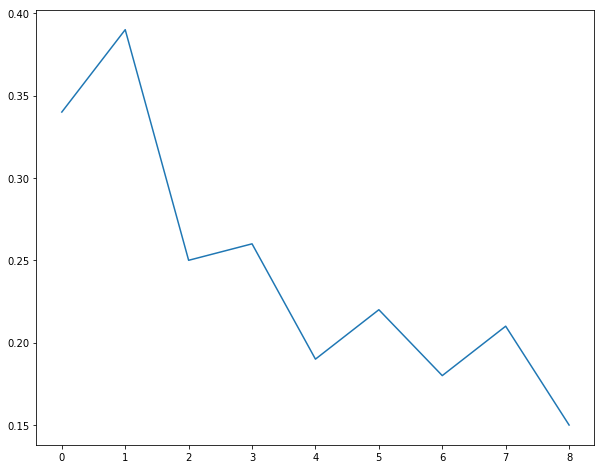

In [100]:
#Selecting an optimal K value

error_rates = []

for i in np.arange(1, 10):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_train, y_train)

    new_predictions = new_model.predict(x_test)

    error_rates.append(np.mean(new_predictions != y_test))

plt.figure(figsize=(10,8))

plt.plot(error_rates)

In [101]:
# K= 5 is the sutable choose
K = 5
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [102]:
y_pred5 = model.predict(x_test)
v_pred5 = model.predict(x_cv)

In [103]:
#score_T = model.score(x_train,y_train)
score_v = model.score(x_cv,y_cv)
score_Te = model.score(x_test,y_test)
print(score_v), print(score_Te)

0.6777777777777778
0.81


(None, None)

In [106]:
confusion_matrix5 = metrics.confusion_matrix(y_test, y_pred)
Accuracy = metrics.accuracy_score(y_test, y_pred)
print(confusion_matrix5), print(Accuracy)

[[10 12]
 [13 65]]
0.75


(None, None)